# Plotting time series of rainfall at a particular location#############

########## PYTHON CODE FOR IMD PREPARED BY LEKSHMI S#############

########## https://doi.org/10.5281/zenodo.5674826 ############

In [1]:
###########Import necessary modules##########################

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
############ File to be read ####################
file_name  = filename='/mnt/d/DATA/ERA5/Wind/ERA5_Wind_2019.nc'


In [3]:
################# open file ######################
f = nc.Dataset(file_name)
print(f)                # gives us information about the variables 
                        #contained in the file and their dimensions
                      
for var in f.variables.values():
    print(var)          # Metadata for all variables

print(f['u10'])          # Metadata of single variable

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-10-22 07:07:25 GMT by grib_to_netcdf-2.23.0: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data8/adaptor.mars.internal-1634886380.7778172-32629-6-191c70ed-188a-4f22-af6f-625200725beb.nc /cache/tmp/191c70ed-188a-4f22-af6f-625200725beb-adaptor.mars.internal-1634885492.4869852-32629-2-tmp.grib
    dimensions(sizes): longitude(129), latitude(129), time(8760)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time,latitude,longitude), int16 v10(time,latitude,longitude)
    groups: 

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (129,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees

/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  import sys
/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if __name__ == '__main__':


In [4]:
################# read variables  ################
u10   = f.variables['u10'][:]
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
time = f.variables['time']		# In the file for the time dimension year has been set as 2010 in all year files

#print(lons.min()," ,",lons.max())
#print(lats)

In [5]:
##############Subscripting over lat, lon and time###############
############Subsetting over time##############
st_date=dt.datetime(2019,6,1,0,0)	# Start date and hour
en_date=dt.datetime(2019,8,1,0,0)	# End date and hour
date=nc.num2date(time[:],units=time.units,calendar='standard')

istart=nc.date2index(st_date,time,calendar='standard',select='exact')
iend=nc.date2index(en_date,time,calendar='standard',select='exact')


/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """
/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  import sys
/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [6]:
############Subsetting over lat and lon##############
latselect=np.where(lats==10.5)
lonselect=np.where(lons==82.5)

u10sub=u10[istart:iend,latselect,lonselect]
print(u10sub.max())
print(u10sub.shape)

10.593755806363555
(1464, 1, 1)


In [7]:
#########Creating date strings for X axis#############
date_string=[]
for n in range(0,u10sub.shape[0],96):
	dates=dt.datetime(2019,6,1,0,0,0)+n*dt.timedelta(hours=1) 
	i=int(n/24)
	date_string.append(dates.strftime('%Y%m%d'))
	del dates
x=np.arange(0,u10sub.shape[0],96)

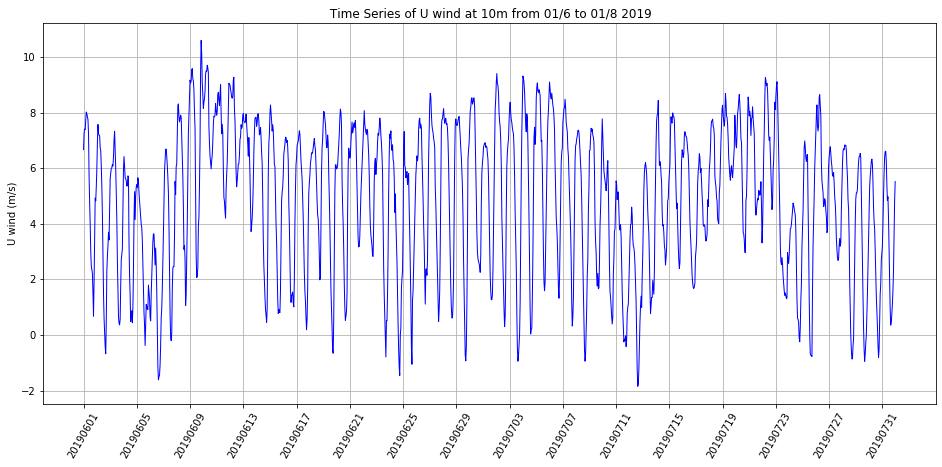

In [8]:
##################Plot time series #################
fig=plt.figure(figsize=(16,7))
plt.plot(u10sub[:,0,0],linewidth=1.0,linestyle='-',color='b')	# marker='o'

plt.title(' Time Series of U wind at 10m from 01/6 to 01/8 2019')
plt.ylabel('U wind (m/s)')	#;plt.xlabel('Time')
plt.xticks(x,date_string,rotation=60)
plt.grid(True)

plt.savefig('time_series.png')